In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go

In [23]:
# Load the dataset
file_path = 'archive (28)/worldpopulationreview.csv'
world_population = pd.read_csv(file_path)

In [24]:
# Data cleaning and type conversion
# Convert percentage strings to floats
def convert_percentage_to_float(percentage_str):
    if pd.isnull(percentage_str):
        return None
    try:
        return float(percentage_str.strip('%')) / 100
    except ValueError:
        return None

# Convert comma-separated strings to floats
def convert_comma_str_to_float(number_str):
    if pd.isnull(number_str):
        return None
    try:
        return float(number_str.replace(',', ''))
    except ValueError:
        return None

# Convert area strings to square kilometers
def convert_area_to_km(area_str):
    if pd.isnull(area_str):
        return None
    try:
        if 'M' in area_str:
            return float(area_str.replace('M', '')) * 1e6
        elif 'K' in area_str:
            return float(area_str.replace('K', '')) * 1e3
        else:
            return float(area_str)  # Assuming already in km² if no unit
    except ValueError:
        return None

# Applying the conversion functions
world_population['Population (Jan 2024)'] = world_population['Population (Jan 2024)'].apply(convert_comma_str_to_float)
world_population['Population(2023)'] = world_population['Population(2023)'].apply(convert_comma_str_to_float)
world_population['Area(km)'] = world_population['Area(km)'].apply(convert_area_to_km)
world_population['Land Area (Km)'] = world_population['Land Area (Km)'].apply(convert_area_to_km)
world_population['Density(/Km)'] = world_population['Density(/Km)'].apply(convert_comma_str_to_float)
world_population['Growth Rate'] = world_population['Growth Rate'].apply(convert_percentage_to_float)
world_population['World%'] = world_population['World%'].apply(convert_percentage_to_float)

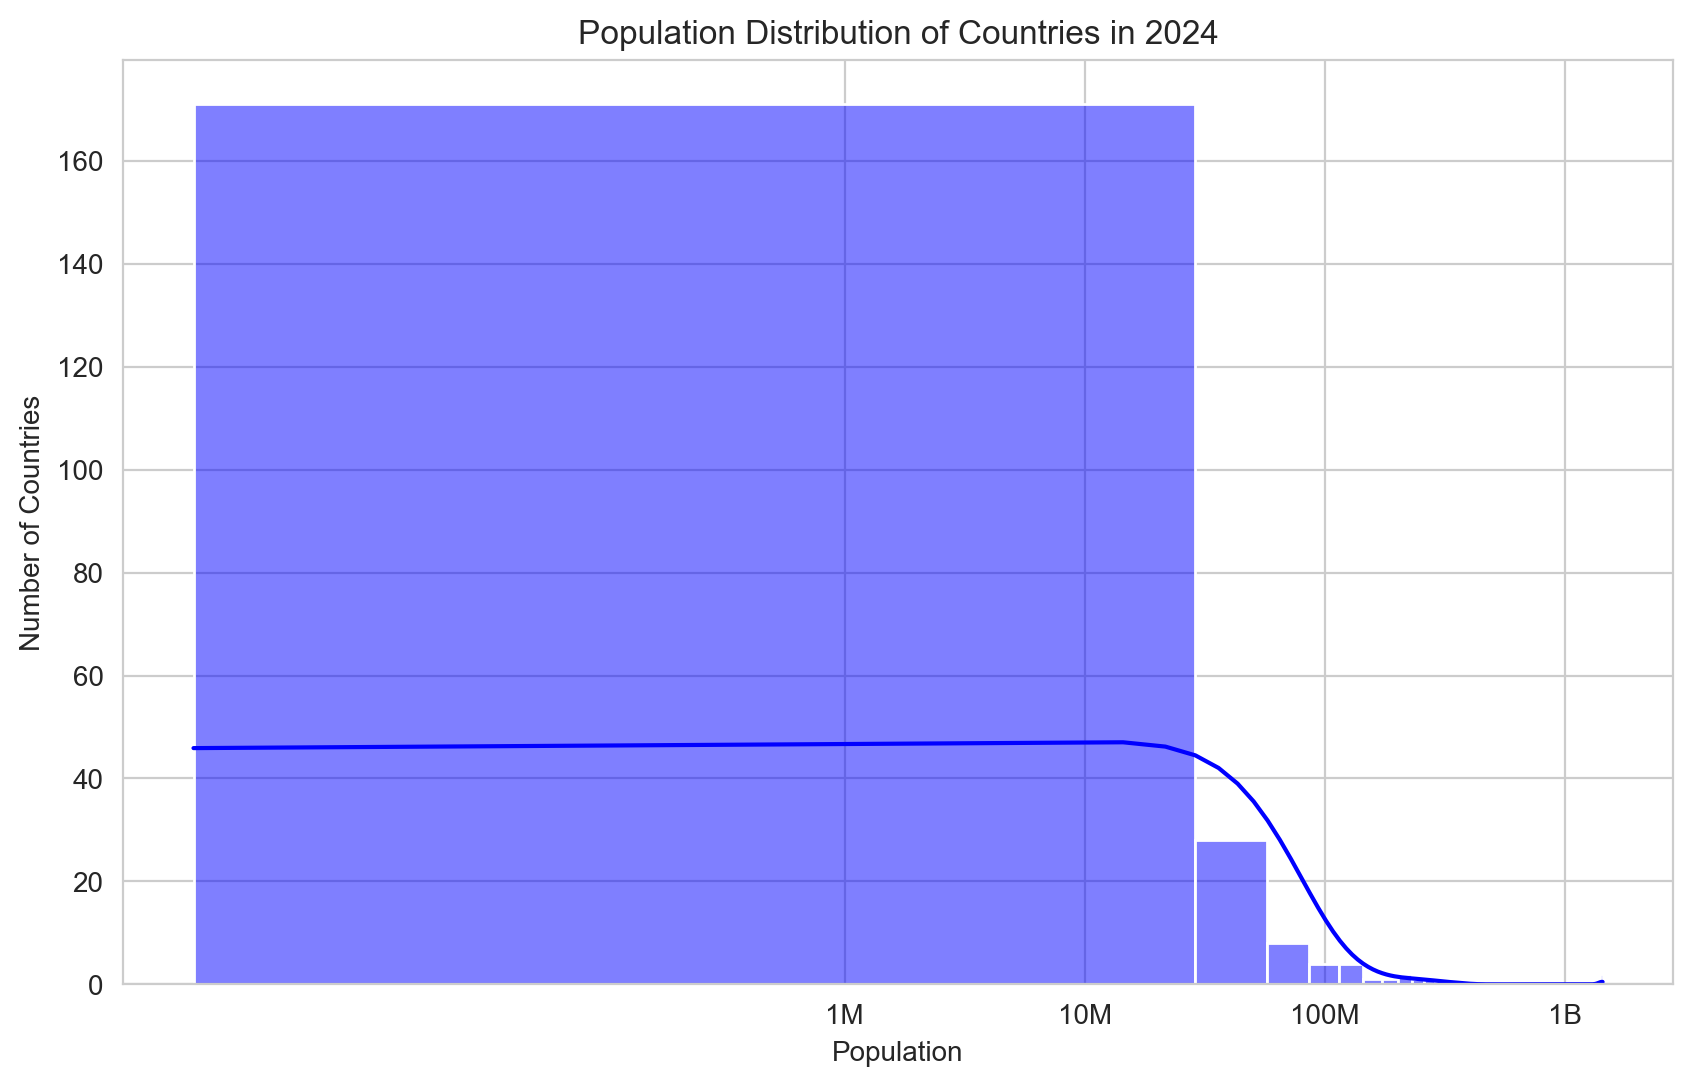

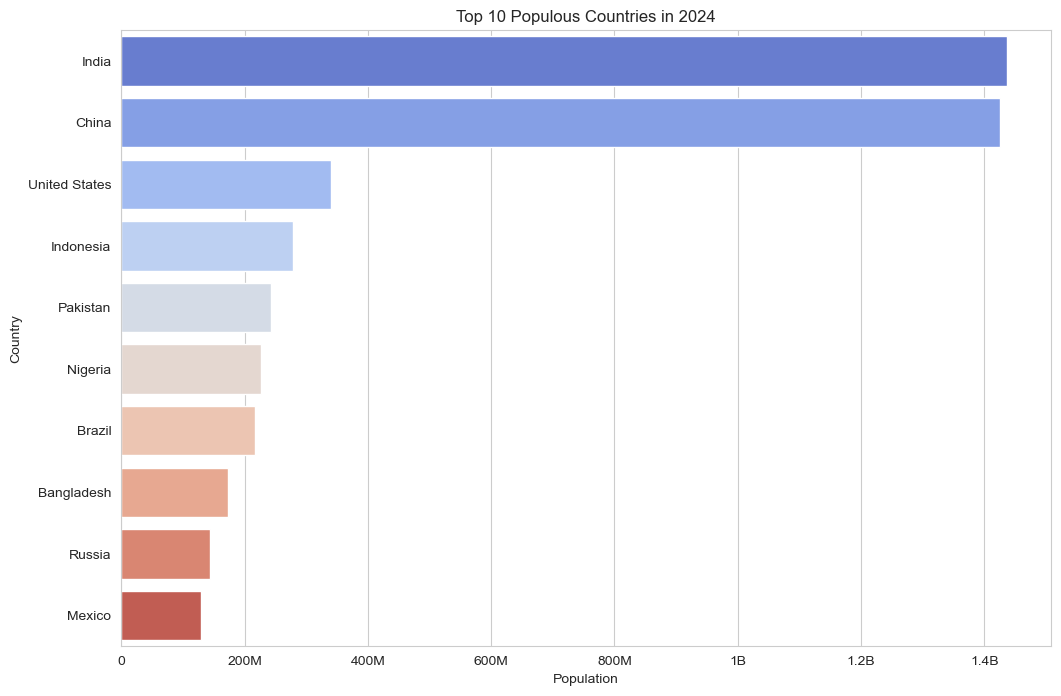

In [25]:
# Visualization 1: Population Distribution
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6), dpi=200)
sns.histplot(world_population['Population (Jan 2024)'], bins=50, kde=True, color='blue')
plt.title('Population Distribution of Countries in 2024')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.xscale('log')
plt.xticks([1e6, 1e7, 1e8, 1e9], ['1M', '10M', '100M', '1B'])
plt.show()

# Visualization 2: Top 10 Populous Countries
top_10_populous_countries = world_population.sort_values(by='Population (Jan 2024)', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='Population (Jan 2024)', y='Country Name', data=top_10_populous_countries, palette='coolwarm')
plt.title('Top 10 Populous Countries in 2024')
plt.xlabel('Population')
plt.ylabel('Country')
plt.xticks([0, 2e8, 4e8, 6e8, 8e8, 1e9, 1.2e9, 1.4e9], ['0', '200M', '400M', '600M', '800M', '1B', '1.2B', '1.4B'])
plt.show()


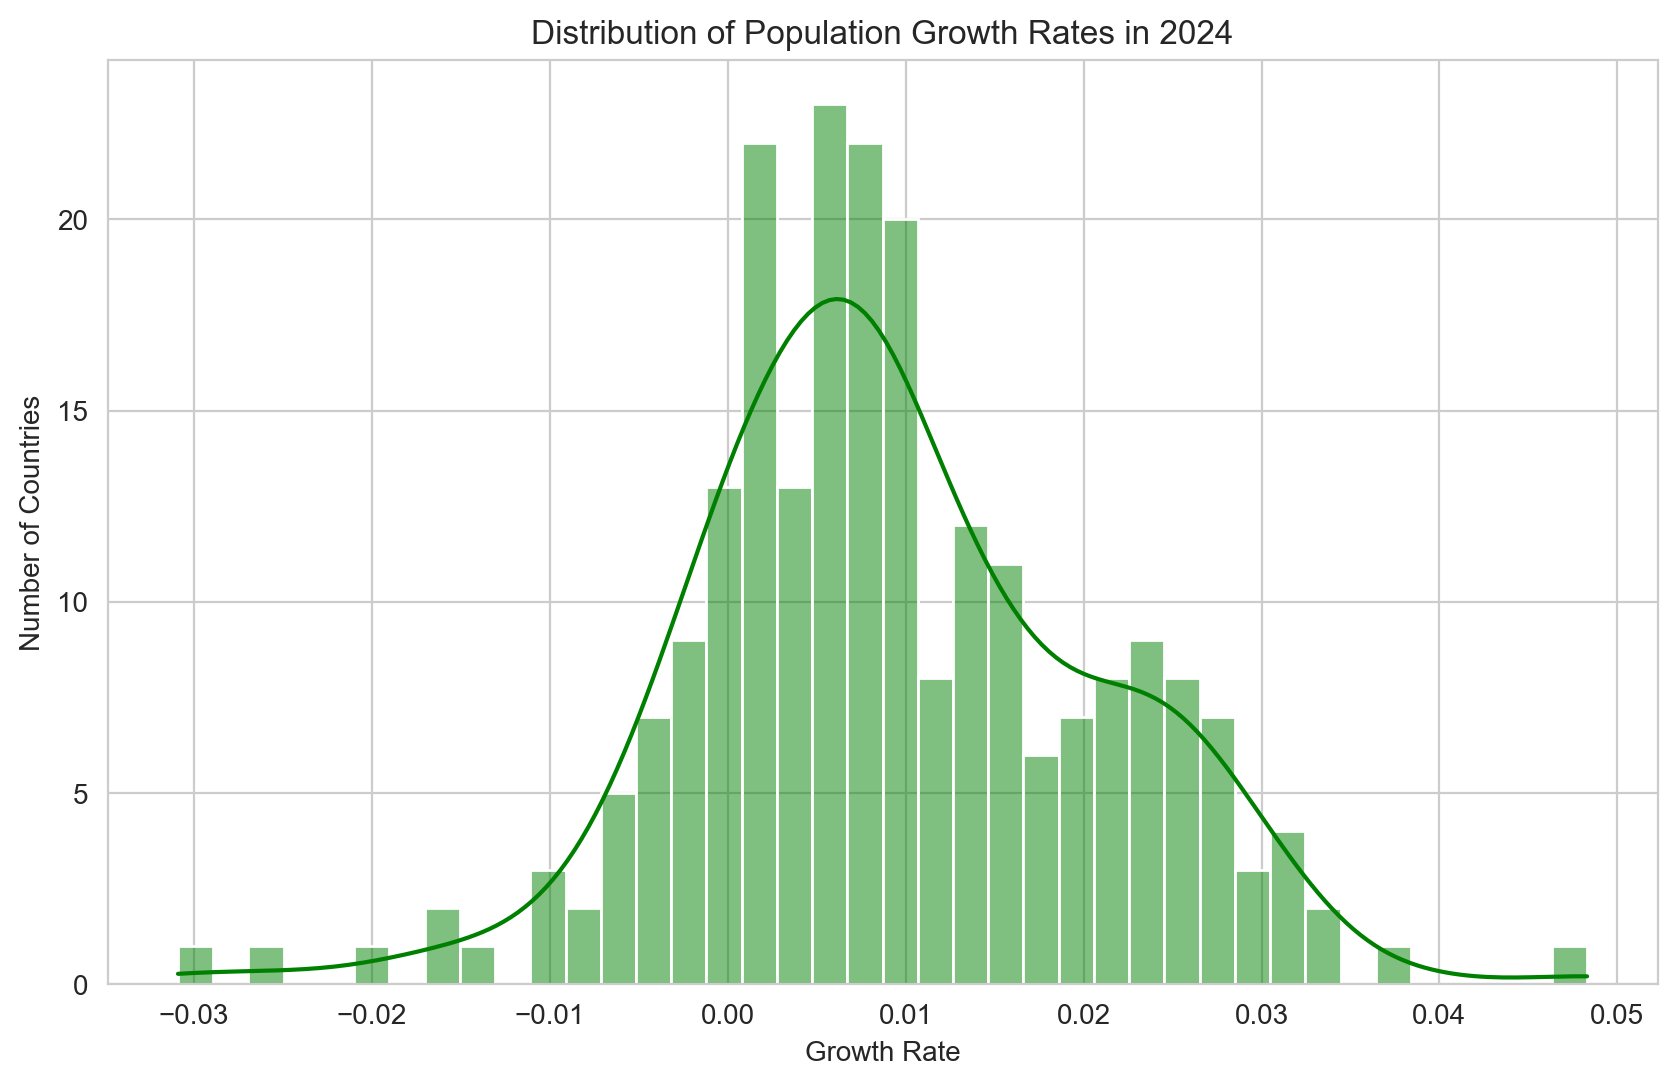

In [26]:
# Visualization 3: Population Growth Rate Distribution
plt.figure(figsize=(10, 6), dpi=200)
sns.histplot(world_population['Growth Rate'], bins=40, color='green', kde=True)
plt.title('Distribution of Population Growth Rates in 2024')
plt.xlabel('Growth Rate')
plt.ylabel('Number of Countries')
plt.show()


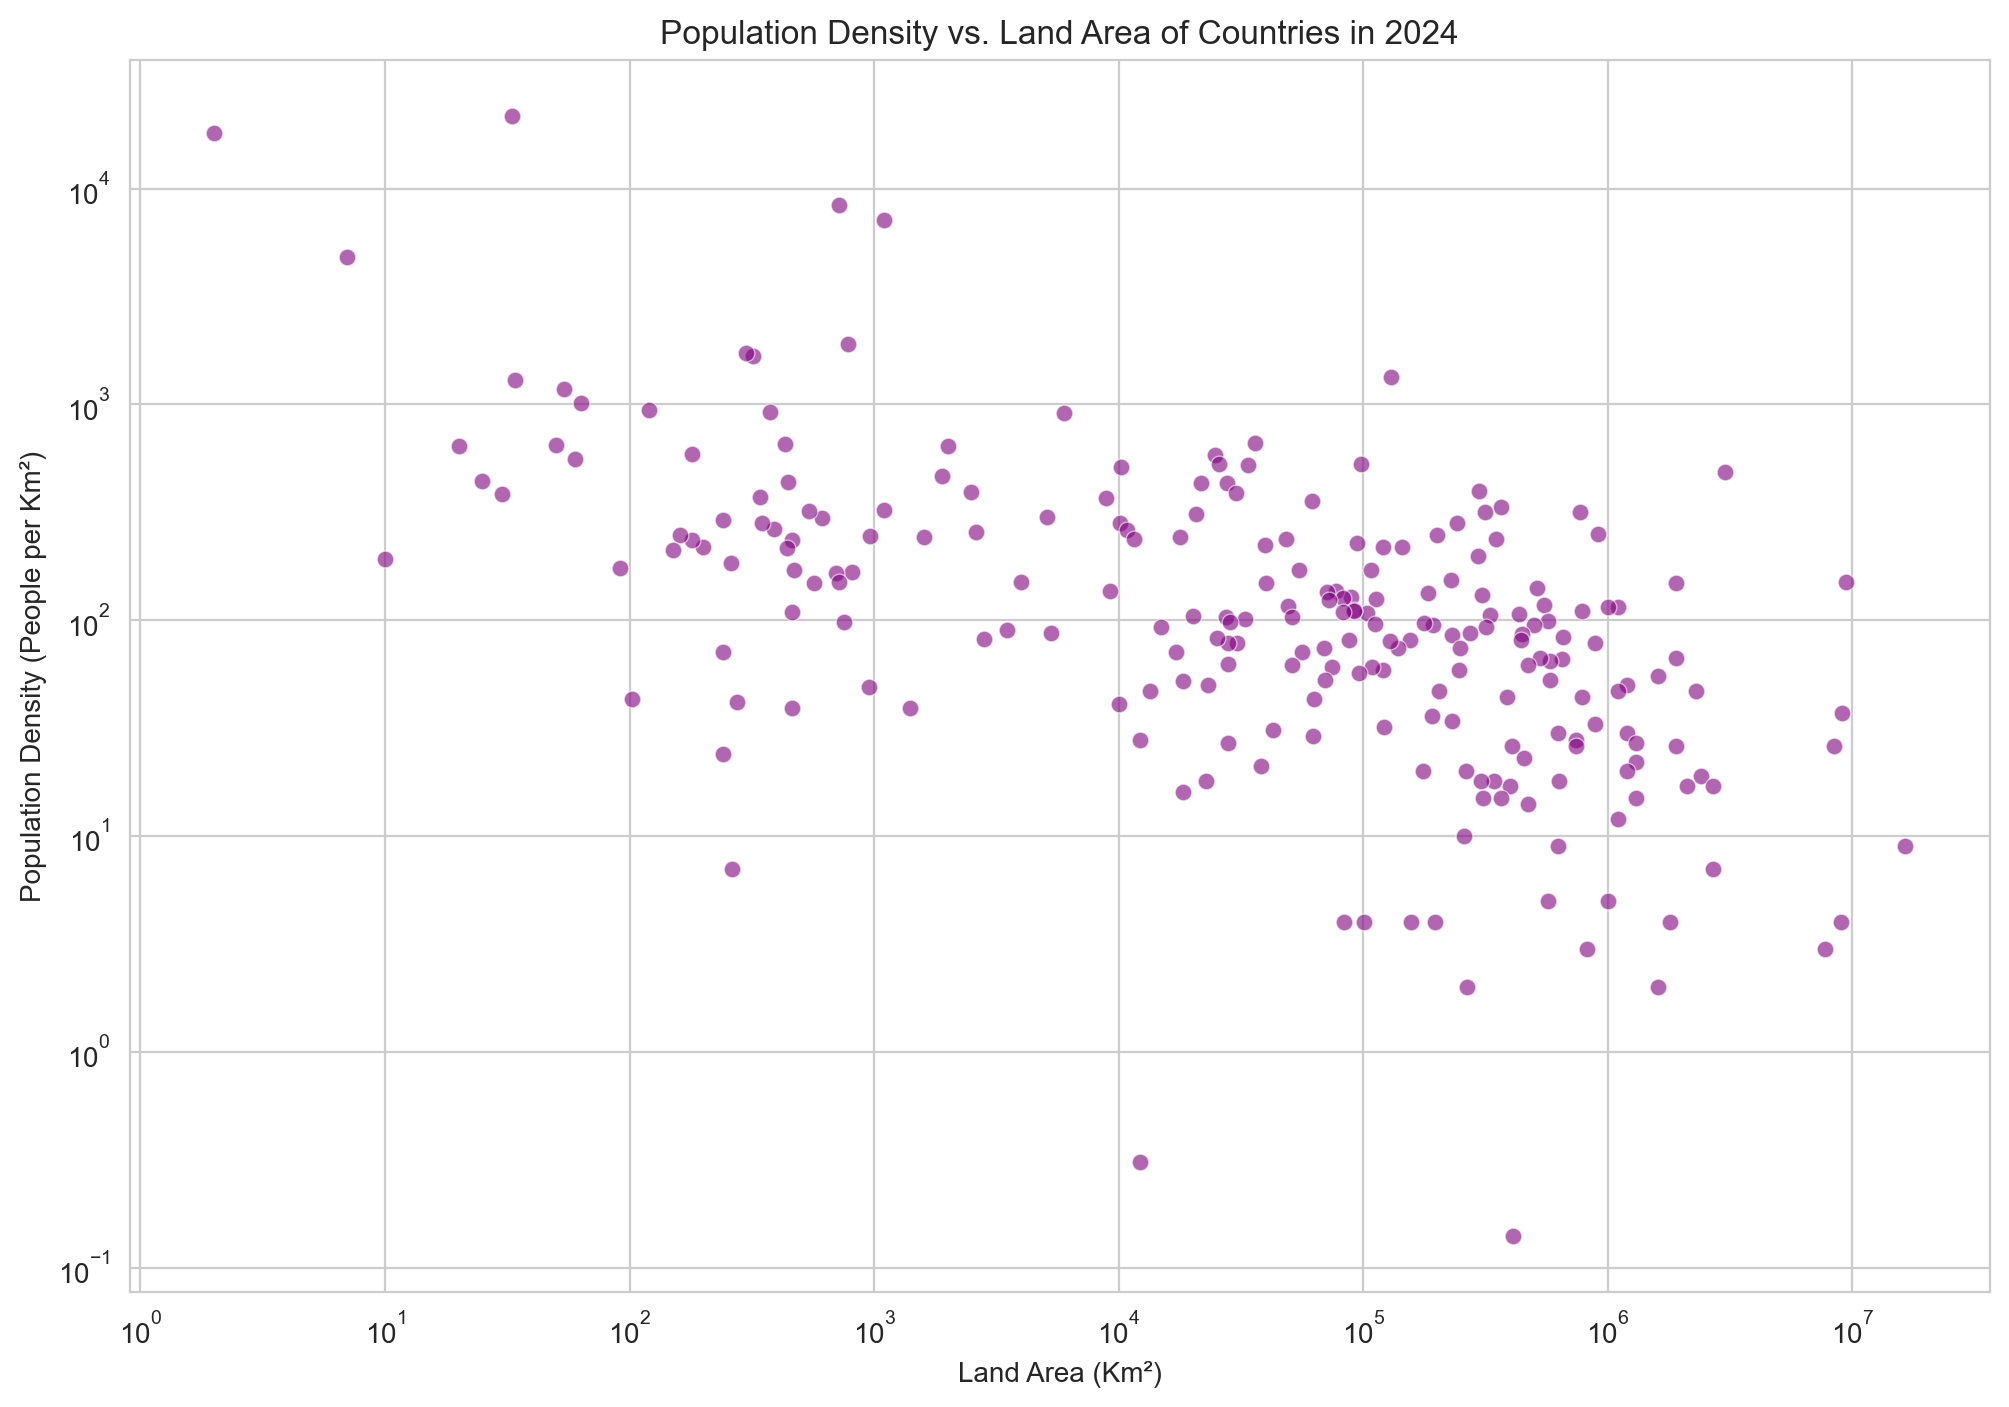

In [27]:
# Visualization 4: Population Density vs. Land Area
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x='Land Area (Km)', y='Density(/Km)', data=world_population, color='purple', alpha=0.6)
plt.title('Population Density vs. Land Area of Countries in 2024')
plt.xlabel('Land Area (Km²)')
plt.ylabel('Population Density (People per Km²)')
plt.xscale('log')
plt.yscale('log')
plt.show()


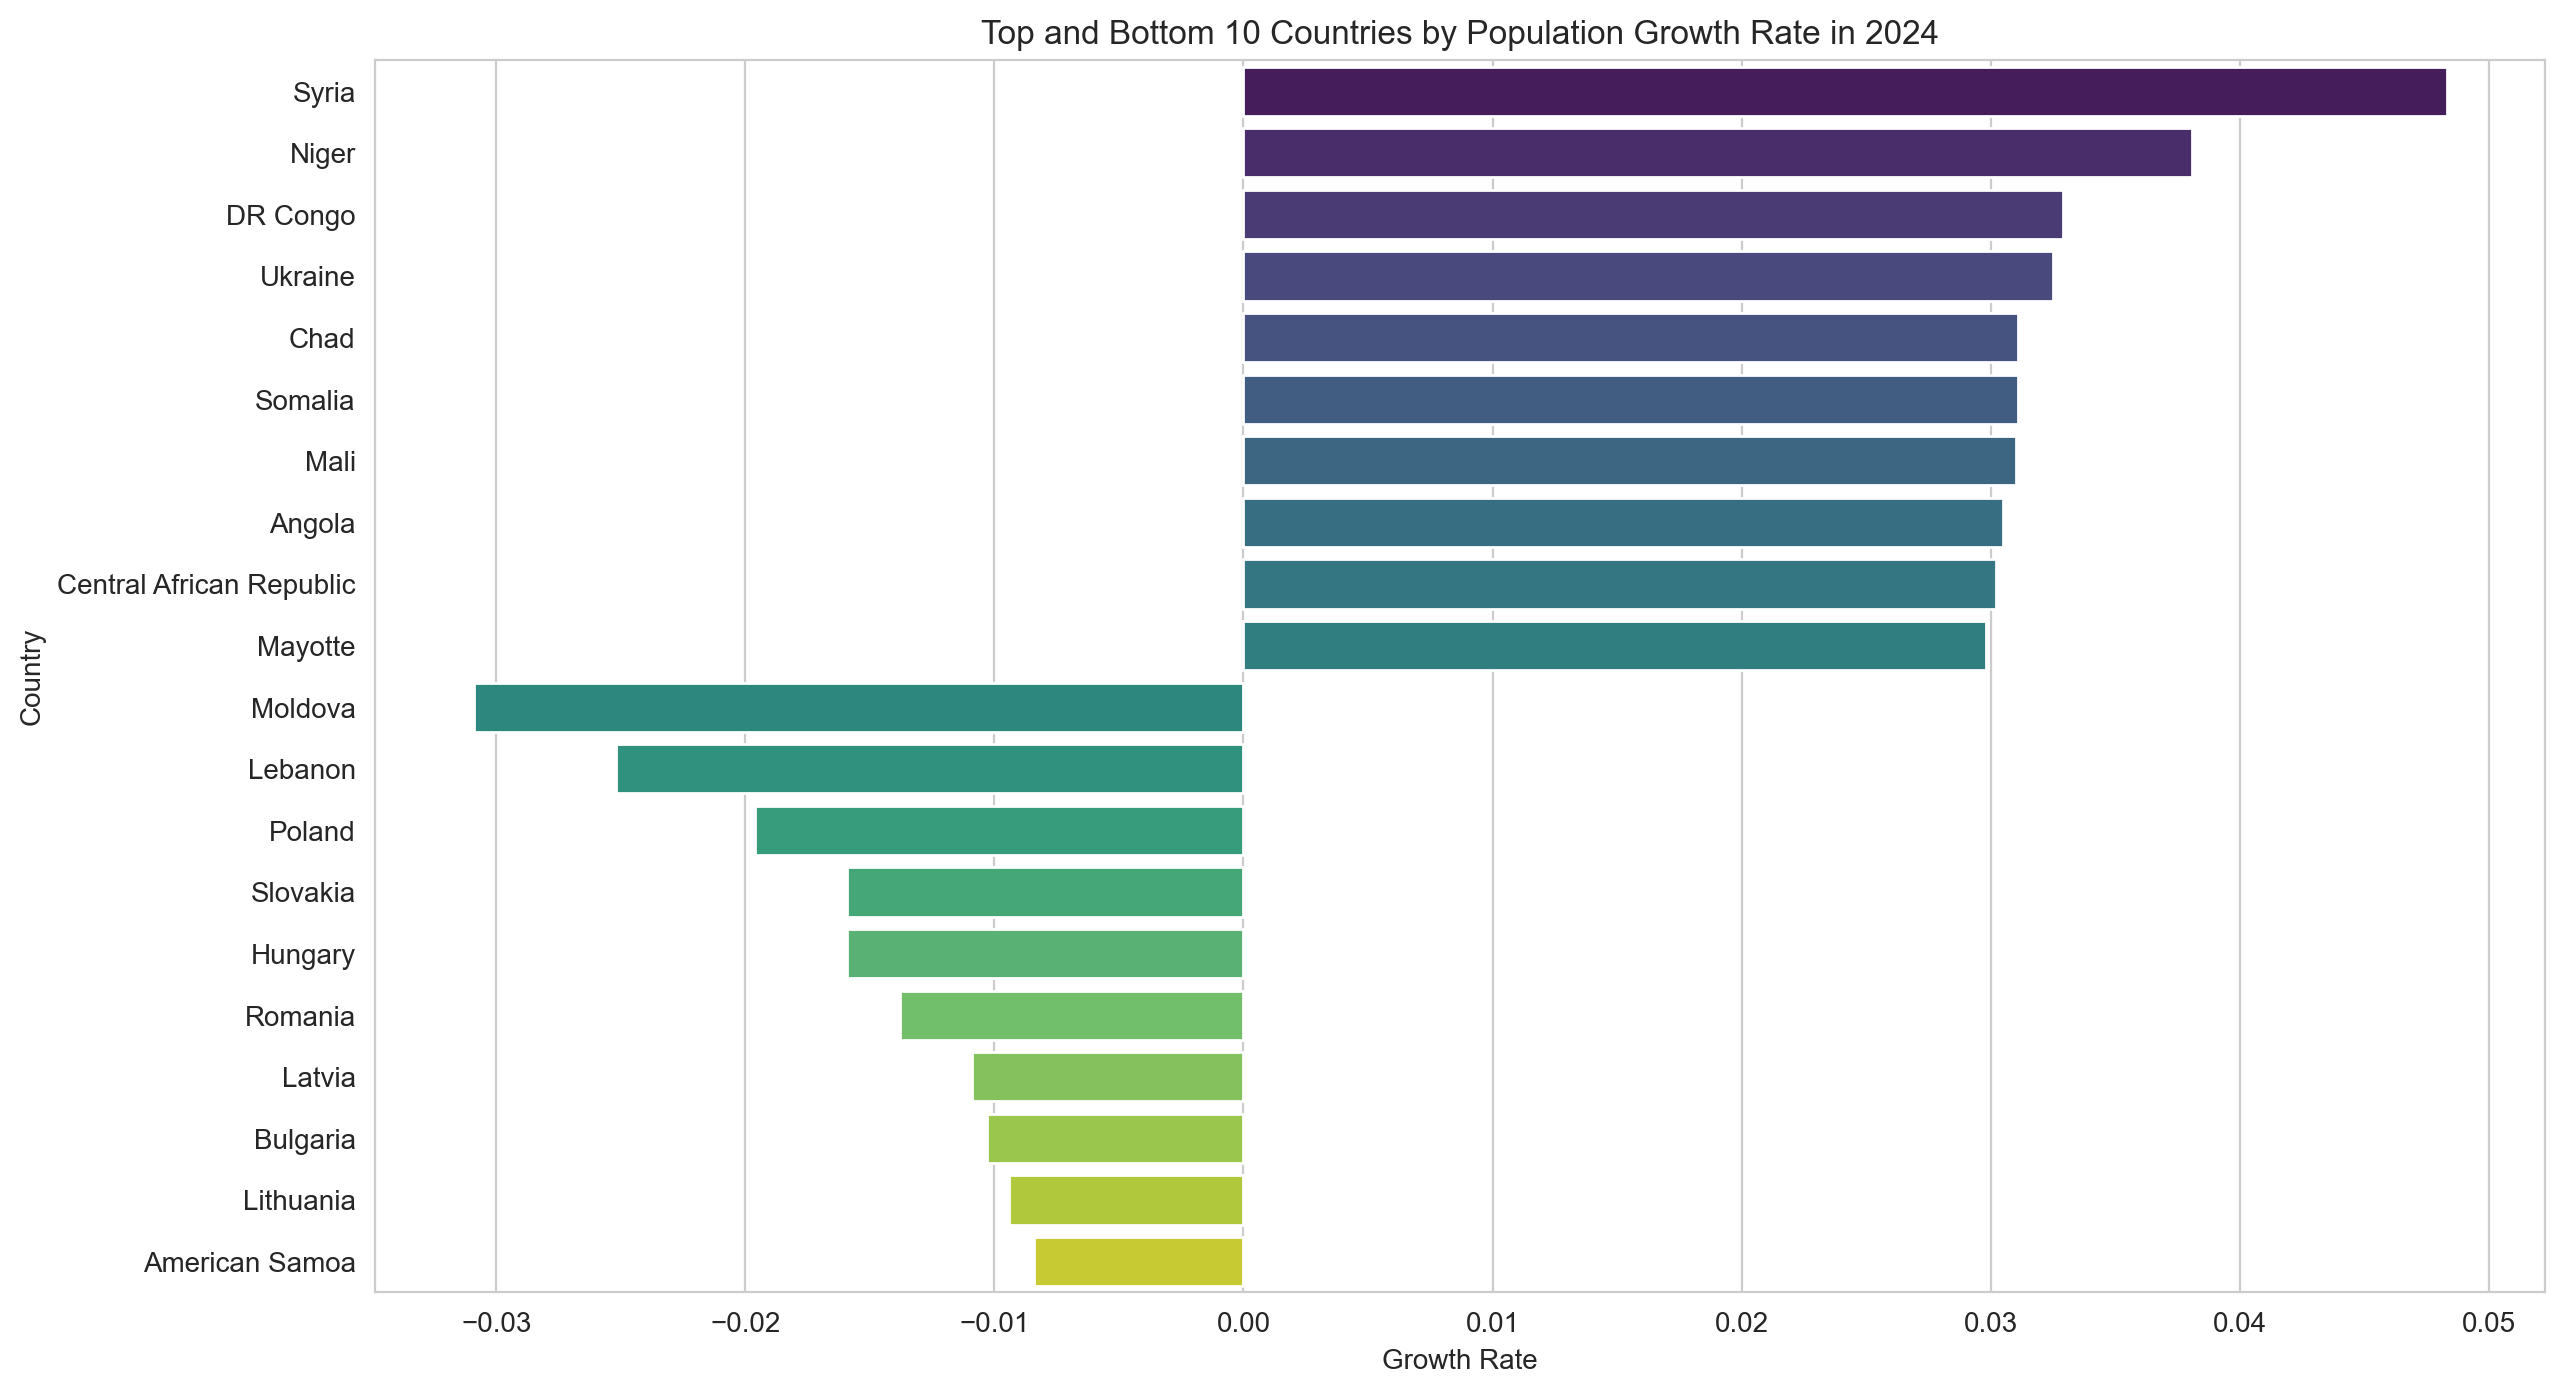

In [28]:
# Extracting the top and bottom 10 countries by growth rate
top_10_growth = world_population.sort_values(by='Growth Rate', ascending=False).head(10)
bottom_10_growth = world_population.sort_values(by='Growth Rate').head(10)

# Combining top and bottom for comparison
combined_growth = pd.concat([top_10_growth, bottom_10_growth])

# Visualization 5: Growth Rate of Top and Bottom 10 Countries
plt.figure(figsize=(14, 8), dpi=200)
sns.barplot(x='Growth Rate', y='Country Name', data=combined_growth, palette='viridis')
plt.title('Top and Bottom 10 Countries by Population Growth Rate in 2024')
plt.xlabel('Growth Rate')
plt.ylabel('Country')
plt.show()


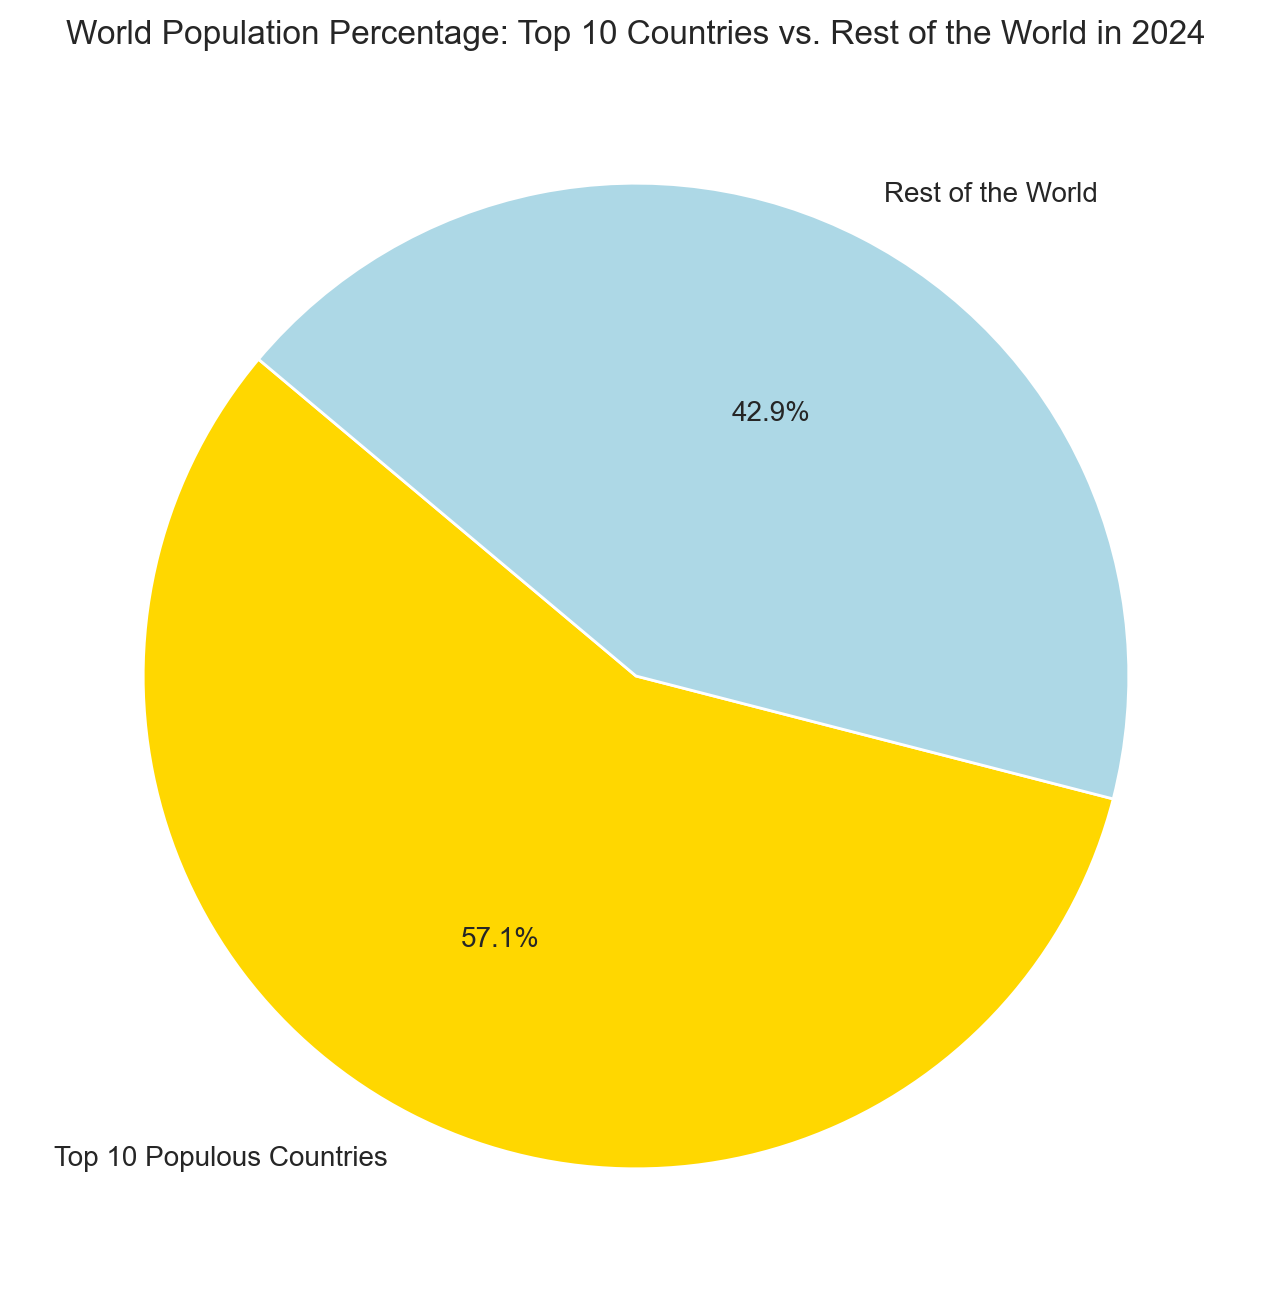

In [29]:
# Calculate the population in top 10 populous countries vs. others
top_10_population_sum = top_10_populous_countries['Population (Jan 2024)'].sum()
rest_population_sum = world_population['Population (Jan 2024)'].sum() - top_10_population_sum

# Data for pie chart
pie_data = [top_10_population_sum, rest_population_sum]
pie_labels = ['Top 10 Populous Countries', 'Rest of the World']

# Visualization 6: World Population Percentage
plt.figure(figsize=(8, 8), dpi=200)
plt.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue'])
plt.title('World Population Percentage: Top 10 Countries vs. Rest of the World in 2024')
plt.show()


In [30]:

# Creating a choropleth map
fig = px.choropleth(world_population,
                    locations='Country Name',  # Column containing country names or ISO codes
                    locationmode='country names',  # Set to "ISO-3" if using ISO codes
                    color='Population (Jan 2024)',  # Column giving the measure
                    hover_name='Country Name',  # Column to display in hover information
                    color_continuous_scale=px.colors.sequential.Plasma,  # Color scale
                    title='World Population in 2024')

fig.show()


In [33]:
# Define the data for the choropleth map
data = go.Choropleth(
    locations=world_population['Country Name'],  # Country names
    z=world_population['Population (Jan 2024)'],  # Population data
    text=world_population['Country Name'],  # Country names for hover text
    locationmode='country names',
    colorscale='Viridis',  # Color scale
    autocolorscale=False,
    reversescale=True,
    marker_line_color='white',  # Change line color for visibility
    marker_line_width=0.5,
    colorbar_title='Population in 2024',
)

# Define the layout with dark background
layout = go.Layout(
    title_text='2024 Global Population',
    title_x=0.5,
    paper_bgcolor='rgba(10,10,10,1)',  # Dark background for the outer area
    plot_bgcolor='rgba(10,10,10,1)',  # Dark background for the plotting area
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='orthographic',
        landcolor='rgb(50,50,50)',  # Dark land color
        oceancolor='rgb(10,10,10)',  # Dark ocean color
        bgcolor='rgba(10,10,10,1)'  # Background color for the globe
    ),
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[dict(label="Spin",
                      method="animate",
                      args=[None, dict(frame=dict(duration=10, redraw=True), 
                                       fromcurrent=True, mode='immediate')])])]
)

# Adjusting the color and font for dark mode
layout.update(
    font=dict(color='white'),  # Text color
    title=dict(font=dict(color='white')),  # Title color
)

# Define the figure
fig = go.Figure(data=data, layout=layout)

fig.show()

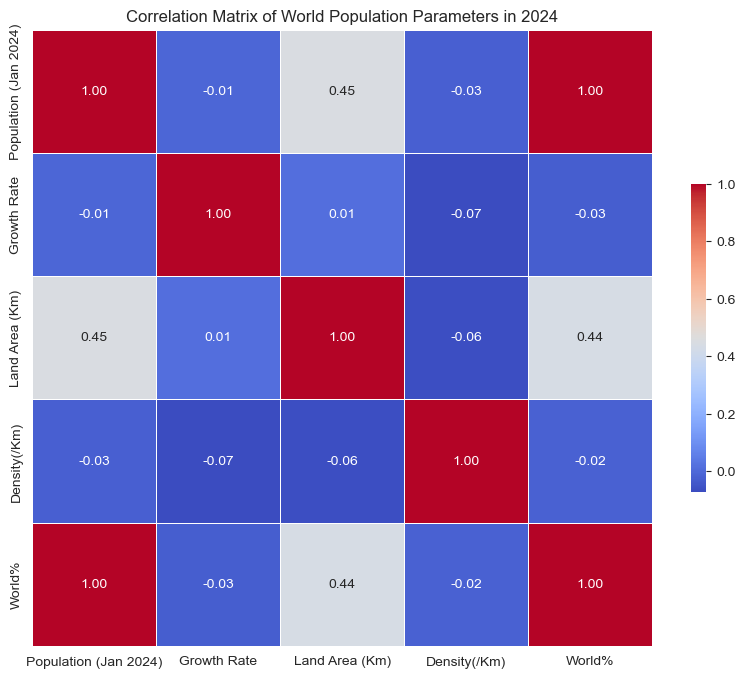

In [34]:
# Selecting relevant numerical columns for the correlation matrix
numerical_cols = ['Population (Jan 2024)', 'Growth Rate', 'Land Area (Km)', 'Density(/Km)', 'World%']
# Calculate the correlation matrix
correlation_matrix = world_population[numerical_cols].corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of World Population Parameters in 2024')
plt.show()